## Standard models for benchmark

-----------------

In [1]:
from testing.training_utils import run_and_save_base_models, run_and_save_hellsemble
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

train_dir = 'resources/data/openml/train'
test_dir = 'resources/data/openml/test'

output_dir = 'resources/data/openml/results'

base_models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}



In [2]:
run_and_save_base_models(train_dir, test_dir, output_dir, models=base_models)

/home/rucinskij/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rucinskij/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from hellsemble.estimator_generator import PredefinedEstimatorsGenerator
from hellsemble.predction_generator import FixedThresholdPredictionGenerator
from testing.training_utils import run_and_save_base_models, run_and_save_hellsemble

base_hellsemble_models = [
        LogisticRegression(),
        SVC(probability=True),
        KNeighborsClassifier(),
        DecisionTreeClassifier(),
    ]

train_dir = 'resources/data/openml/train'
test_dir = 'resources/data/openml/test'

output_dir = 'resources/data/openml/results'


In [2]:
run_and_save_hellsemble(train_dir, test_dir, output_dir, estimators_generator=PredefinedEstimatorsGenerator, models=base_hellsemble_models)

/home/rucinskij/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rucinskij/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [3]:
run_and_save_hellsemble(train_dir, test_dir, output_dir, estimators_generator=PredefinedEstimatorsGenerator, models=base_hellsemble_models, mode = "greedy")

/home/rucinskij/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/rucinskij/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

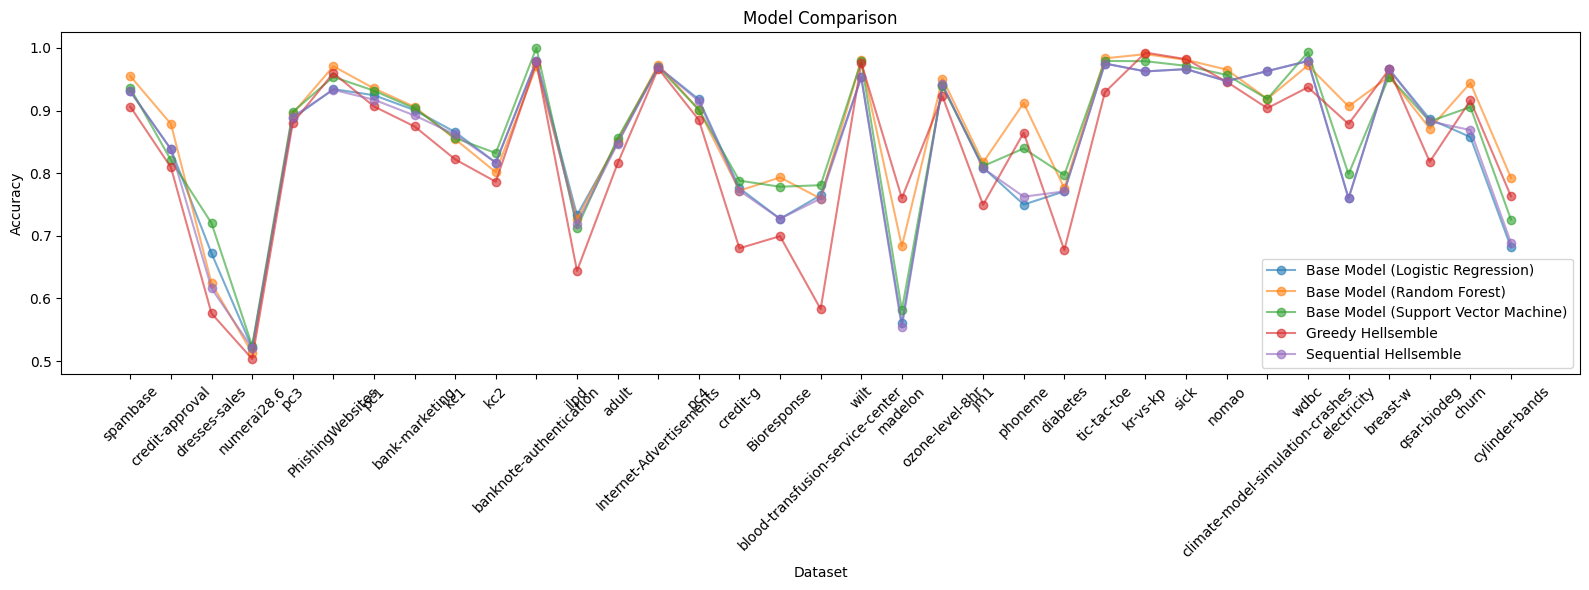

In [28]:
import json
import matplotlib.pyplot as plt

with open('/home/rucinskij/KNMM/hellsemble/resources/data/openml/results/hellsemble_results_greedy.json', 'r') as file:
    greedy_hellsemble_results = json.load(file)

with open('/home/rucinskij/KNMM/hellsemble/resources/data/openml/results/hellsemble_results_Sequential.json', 'r') as file:
    sequential_hellsemble_results = json.load(file)

with open('/home/rucinskij/KNMM/hellsemble/resources/data/openml/results/all_results.json', 'r') as file:
    base_model_results = json.load(file)
    
datasets = list(base_model_results.keys())
base_model_logreg_accuracies = [base_model_results[dataset]['Logistic Regression'] for dataset in datasets]
base_model_rf_accuracies = [base_model_results[dataset]['Random Forest'] for dataset in datasets]
base_model_svm_accuracies = [base_model_results[dataset]['Support Vector Machine'] for dataset in datasets]
hellsemble_accuracies = [greedy_hellsemble_results[dataset] for dataset in datasets]
sequential_hellsemble_accuracies = [sequential_hellsemble_results[dataset] for dataset in datasets]

plt.figure(figsize=(16, 6))
plt.plot(datasets, base_model_logreg_accuracies, label='Base Model (Logistic Regression)', marker='o', alpha=0.6)
plt.plot(datasets, base_model_rf_accuracies, label='Base Model (Random Forest)', marker='o', alpha=0.6)
plt.plot(datasets, base_model_svm_accuracies, label='Base Model (Support Vector Machine)', marker='o', alpha=0.6)
plt.plot(datasets, hellsemble_accuracies, label='Greedy Hellsemble', marker='o', alpha=0.6)
plt.plot(datasets, sequential_hellsemble_accuracies, label='Sequential Hellsemble', marker='o', alpha=0.6)


plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [2]:
import json
import plotly.graph_objects as go
from plotly.offline import plot


with open('/home/rucinskij/KNMM/hellsemble/resources/data/openml/results/hellsemble_results_greedy.json', 'r') as file:
    greedy_hellsemble_results = json.load(file)

with open('/home/rucinskij/KNMM/hellsemble/resources/data/openml/results/hellsemble_results_Sequential.json', 'r') as file:
    sequential_hellsemble_results = json.load(file)

with open('/home/rucinskij/KNMM/hellsemble/resources/data/openml/results/all_results.json', 'r') as file:
    base_model_results = json.load(file)


datasets = list(base_model_results.keys())
base_model_logreg_accuracies = [base_model_results[dataset]['Logistic Regression'] for dataset in datasets]
base_model_rf_accuracies = [base_model_results[dataset]['Random Forest'] for dataset in datasets]
base_model_svm_accuracies = [base_model_results[dataset]['Support Vector Machine'] for dataset in datasets]
hellsemble_accuracies = [greedy_hellsemble_results[dataset] for dataset in datasets]
sequential_hellsemble_accuracies = [sequential_hellsemble_results[dataset] for dataset in datasets]

fig = go.Figure()

fig.add_trace(go.Scatter(x=datasets, y=base_model_logreg_accuracies, mode='lines+markers', name='Base Model (Logistic Regression)'))
fig.add_trace(go.Scatter(x=datasets, y=base_model_rf_accuracies, mode='lines+markers', name='Base Model (Random Forest)'))
fig.add_trace(go.Scatter(x=datasets, y=base_model_svm_accuracies, mode='lines+markers', name='Base Model (Support Vector Machine)'))
fig.add_trace(go.Scatter(x=datasets, y=hellsemble_accuracies, mode='lines+markers', name='Greedy Hellsemble'))
fig.add_trace(go.Scatter(x=datasets, y=sequential_hellsemble_accuracies, mode='lines+markers', name='Sequential Hellsemble'))

fig.update_layout(
    title='Model Comparison',
    xaxis_title='Dataset',
    yaxis_title='Accuracy',
    legend_title='Models',
    xaxis=dict(tickangle=45),
    template='plotly_white'
)

plot(fig, filename='model_comparison.html')

'model_comparison.html'

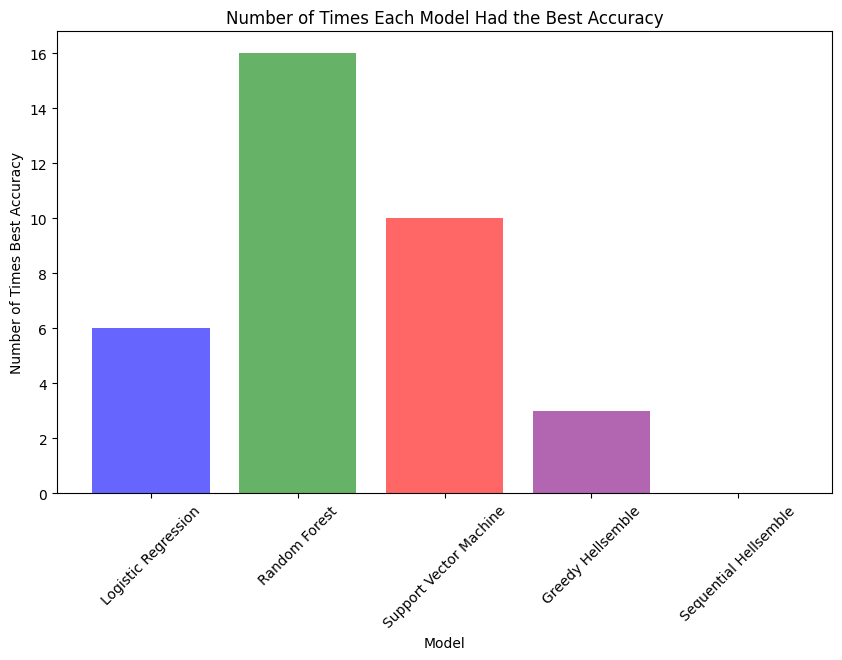

In [32]:

labels = ['Logistic Regression', 'Random Forest', 'Support Vector Machine', 'Greedy Hellsemble', 'Sequential Hellsemble']
colors = ['blue', 'green', 'red', 'purple', 'orange']

best_methods = []
for i in range(len(datasets)):
    accuracies = [
        base_model_logreg_accuracies[i],
        base_model_rf_accuracies[i],
        base_model_svm_accuracies[i],
        greedy_hellsemble_results[datasets[i]],
        sequential_hellsemble_results[datasets[i]]
    ]
    best_methods.append(accuracies.index(max(accuracies)))

best_method_counts = [best_methods.count(i) for i in range(len(labels))]

plt.figure(figsize=(10, 6))
plt.bar(labels, best_method_counts, color=colors, alpha=0.6)
plt.xlabel('Model')
plt.ylabel('Number of Times Best Accuracy')
plt.title('Number of Times Each Model Had the Best Accuracy')
plt.xticks(rotation=45)
plt.show()

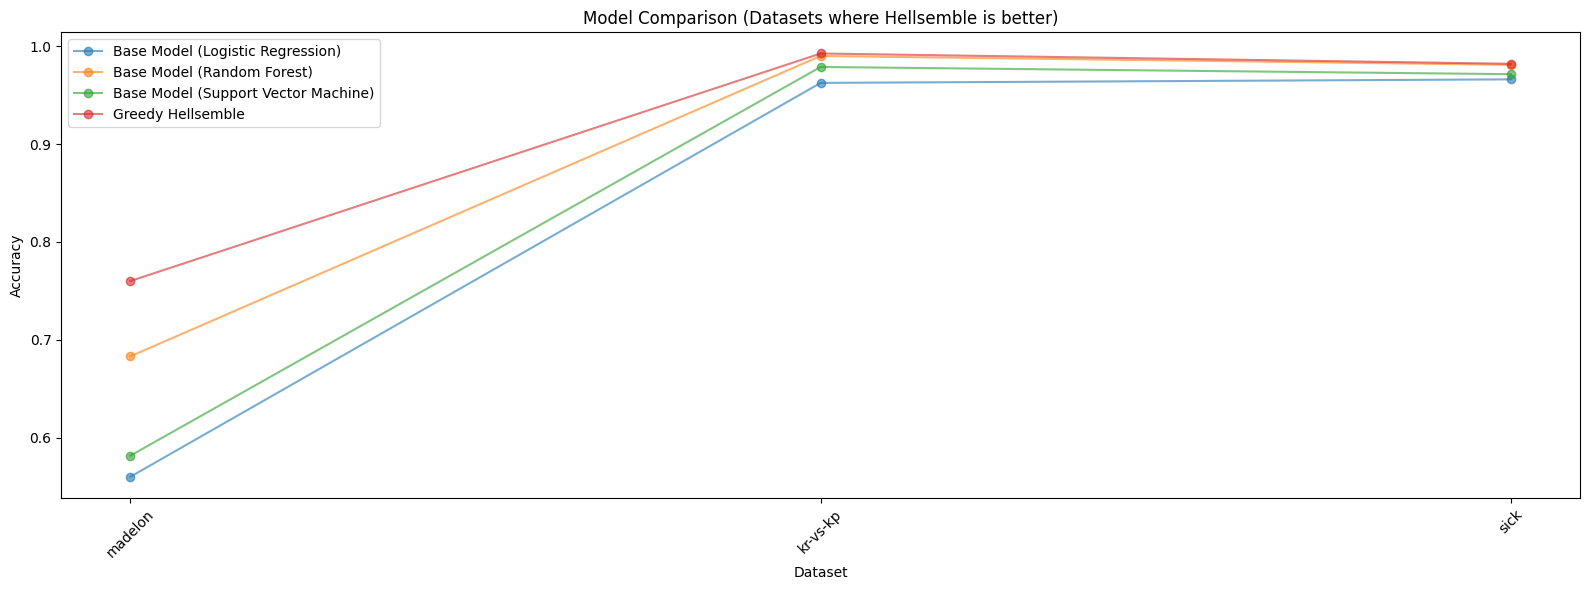

In [4]:
import json
import matplotlib.pyplot as plt
better_hellsemble_datasets = []
better_hellsemble_accuracies = []
better_base_model_logreg_accuracies = []
better_base_model_rf_accuracies = []
better_base_model_svm_accuracies = []

for i, dataset in enumerate(datasets):
    if hellsemble_accuracies[i] > max(base_model_logreg_accuracies[i], base_model_rf_accuracies[i], base_model_svm_accuracies[i]):
        better_hellsemble_datasets.append(dataset)
        better_hellsemble_accuracies.append(hellsemble_accuracies[i])
        better_base_model_logreg_accuracies.append(base_model_logreg_accuracies[i])
        better_base_model_rf_accuracies.append(base_model_rf_accuracies[i])
        better_base_model_svm_accuracies.append(base_model_svm_accuracies[i])

plt.figure(figsize=(16, 6))
plt.plot(better_hellsemble_datasets, better_base_model_logreg_accuracies, label='Base Model (Logistic Regression)', marker='o', alpha=0.6)
plt.plot(better_hellsemble_datasets, better_base_model_rf_accuracies, label='Base Model (Random Forest)', marker='o', alpha=0.6)
plt.plot(better_hellsemble_datasets, better_base_model_svm_accuracies, label='Base Model (Support Vector Machine)', marker='o', alpha=0.6)
plt.plot(better_hellsemble_datasets, better_hellsemble_accuracies, label='Greedy Hellsemble', marker='o', alpha=0.6)

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Comparison (Datasets where Hellsemble is better)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Dataset: madelon
  Logistic Regression: 0.5600
  Random Forest: 0.6831
  Support Vector Machine: 0.5815
  Greedy Hellsemble: 0.7600
  Sequential Hellsemble: 0.5538

Dataset: kr-vs-kp
  Logistic Regression: 0.9625
  Random Forest: 0.9900
  Support Vector Machine: 0.9787
  Greedy Hellsemble: 0.9925
  Sequential Hellsemble: 0.9625

Dataset: sick
  Logistic Regression: 0.9661
  Random Forest: 0.9809
  Support Vector Machine: 0.9714
  Greedy Hellsemble: 0.9820
  Sequential Hellsemble: 0.9661



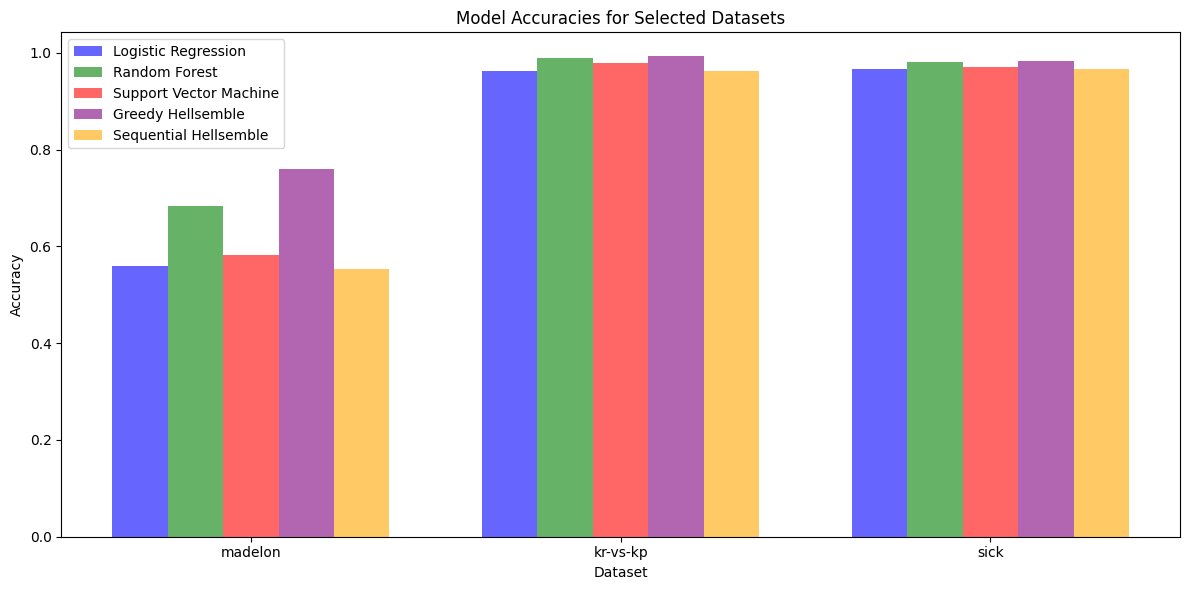

In [7]:


datasets_of_interest = ['madelon', 'kr-vs-kp', 'sick']

logreg_accuracies = [base_model_results[dataset]['Logistic Regression'] for dataset in datasets_of_interest]
rf_accuracies = [base_model_results[dataset]['Random Forest'] for dataset in datasets_of_interest]
svm_accuracies = [base_model_results[dataset]['Support Vector Machine'] for dataset in datasets_of_interest]
hellsemble_accuracies_of_interest = [greedy_hellsemble_results[dataset] for dataset in datasets_of_interest]
sequential_hellsemble_accuracies_of_interest = [sequential_hellsemble_results[dataset] for dataset in datasets_of_interest]

for i, dataset in enumerate(datasets_of_interest):
    print(f"Dataset: {dataset}")
    print(f"  Logistic Regression: {logreg_accuracies[i]:.4f}")
    print(f"  Random Forest: {rf_accuracies[i]:.4f}")
    print(f"  Support Vector Machine: {svm_accuracies[i]:.4f}")
    print(f"  Greedy Hellsemble: {hellsemble_accuracies_of_interest[i]:.4f}")
    print(f"  Sequential Hellsemble: {sequential_hellsemble_accuracies_of_interest[i]:.4f}")
    print()


plt.figure(figsize=(12, 6))
x = np.arange(len(datasets_of_interest))
width = 0.15

plt.bar(x - 2*width, logreg_accuracies, width, label='Logistic Regression', color='blue', alpha=0.6)
plt.bar(x - width, rf_accuracies, width, label='Random Forest', color='green', alpha=0.6)
plt.bar(x, svm_accuracies, width, label='Support Vector Machine', color='red', alpha=0.6)
plt.bar(x + width, hellsemble_accuracies_of_interest, width, label='Greedy Hellsemble', color='purple', alpha=0.6)
plt.bar(x + 2*width, sequential_hellsemble_accuracies_of_interest, width, label='Sequential Hellsemble', color='orange', alpha=0.6)

plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Model Accuracies for Selected Datasets')
plt.xticks(x, datasets_of_interest)
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd

madelon_df = pd.read_csv('/home/rucinskij/KNMM/hellsemble/resources/data/openml/train/madelon.csv')
kr_vs_kp_df = pd.read_csv('/home/rucinskij/KNMM/hellsemble/resources/data/openml/train/kr-vs-kp.csv')
sick_df = pd.read_csv('/home/rucinskij/KNMM/hellsemble/resources/data/openml/train/sick.csv')

print("Spambase")
madelon_df.info()

print("\nCredit Approval")
kr_vs_kp_df.info()

print("\nDresses Sales:")
sick_df.info()


Spambase
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1950 entries, 0 to 1949
Columns: 501 entries, 0 to target
dtypes: float64(500), int64(1)
memory usage: 7.5 MB

Credit Approval
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2397 entries, 0 to 2396
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2397 non-null   float64
 1   1       2397 non-null   float64
 2   2       2397 non-null   float64
 3   3       2397 non-null   float64
 4   4       2397 non-null   float64
 5   5       2397 non-null   float64
 6   6       2397 non-null   float64
 7   7       2397 non-null   float64
 8   8       2397 non-null   float64
 9   9       2397 non-null   float64
 10  10      2397 non-null   float64
 11  11      2397 non-null   float64
 12  12      2397 non-null   float64
 13  13      2397 non-null   float64
 14  14      2397 non-null   float64
 15  15      2397 non-null   float64
 16  16      2397 non-null   float64
 17 